In [1]:
import numpy as np

x = np.linspace(-0.5, 0.5, 100)
print(x[:10])

[-0.5        -0.48989899 -0.47979798 -0.46969697 -0.45959596 -0.44949495
 -0.43939394 -0.42929293 -0.41919192 -0.40909091]


In [2]:
xs = x.reshape(x.shape[0], 1)
print(xs[:10])

[[-0.5       ]
 [-0.48989899]
 [-0.47979798]
 [-0.46969697]
 [-0.45959596]
 [-0.44949495]
 [-0.43939394]
 [-0.42929293]
 [-0.41919192]
 [-0.40909091]]


In [8]:
np.random.seed(1)
y = x + np.random.normal(loc=0, scale=0.1, size=x.shape[0])
print(y[:10])

[-0.33756546 -0.55107463 -0.53261516 -0.57699383 -0.3730552  -0.67964882
 -0.26491276 -0.50541362 -0.38728801 -0.43402795]


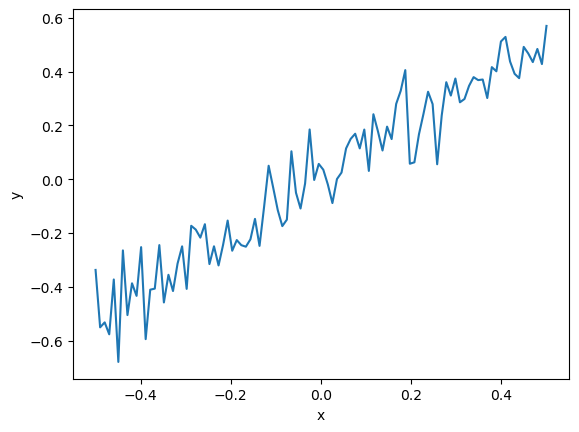

In [12]:
import matplotlib.pyplot as plt



plt.plot(x, y)
plt.xlabel('x')
_ = plt.ylabel('y')

In [13]:
from sklearn.tree import DecisionTreeRegressor

simple_tree = DecisionTreeRegressor(max_depth=1)
simple_tree.fit(xs, y)

DecisionTreeRegressor(max_depth=1)

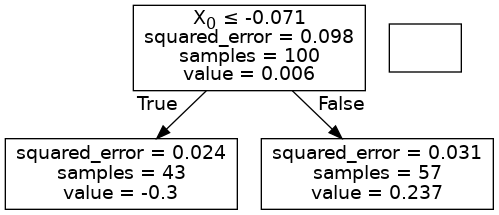

In [15]:
from io import StringIO
from sklearn import tree
import pydotplus
from IPython.display import Image  

dot_data = StringIO()
tree.export_graphviz(simple_tree, out_file=dot_data, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

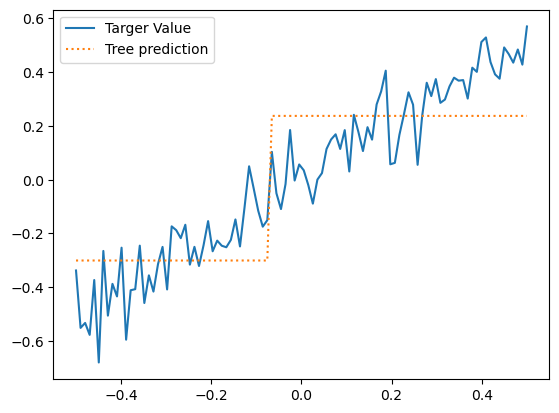

In [16]:
y_pred = simple_tree.predict(xs)
plt.plot(x, y, label='Targer Value')
plt.plot(x, y_pred, label='Tree prediction', linestyle='dotted')
plt.legend()

In [18]:
simple_tree_2 = DecisionTreeRegressor(max_depth=2)
simple_tree_2.fit(xs, y)

DecisionTreeRegressor(max_depth=2)

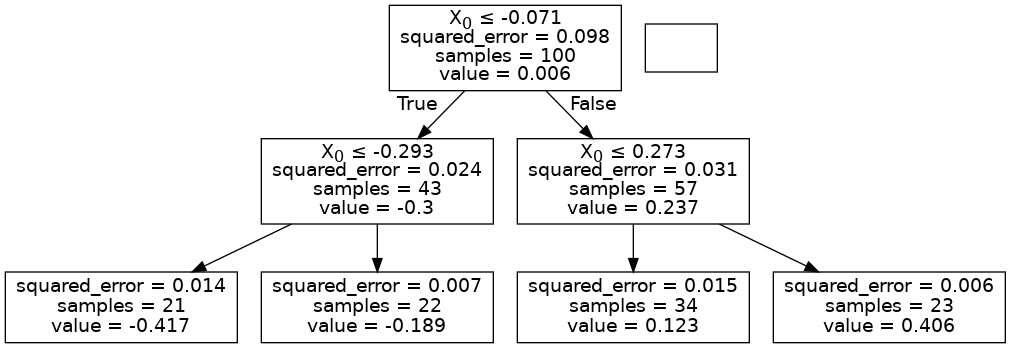

In [19]:
dot_data = StringIO()
tree.export_graphviz(simple_tree_2, out_file=dot_data, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

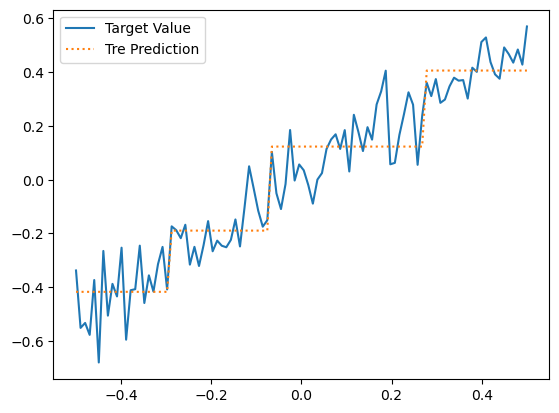

In [21]:
y_pred_2 = simple_tree_2.predict(xs)
plt.plot(xs, y, label='Target Value')
plt.plot(x, y_pred_2, label='Tre Prediction', linestyle='dotted')
plt.legend()

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

parameters = [
    {'max_depth': list(range(1, 11))}
]

cv = KFold(n_splits=5, shuffle=True, random_state=1234)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf.fit(xs, y)
print(clf.best_estimator_)


DecisionTreeRegressor(max_depth=3)


In [25]:
import pandas as pd 

cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001017,0.000458,0.000502,0.000182,1,{'max_depth': 1},0.671771,0.712897,0.670129,0.653752,0.286538,0.599017,0.157453,10
1,0.000618,0.000371,0.000409,0.000213,2,{'max_depth': 2},0.866643,0.817631,0.799860,0.872897,0.685216,0.808449,0.067653,9
2,0.000227,0.000005,0.000212,0.000007,3,{'max_depth': 3},0.939506,0.849468,0.862148,0.913345,0.839317,0.880757,0.038874,1
3,0.000360,0.000076,0.000290,0.000042,4,{'max_depth': 4},0.929751,0.832327,0.838513,0.898116,0.825772,0.864896,0.041466,2
4,0.000864,0.000278,0.000516,0.000122,5,{'max_depth': 5},0.905945,0.779442,0.846279,0.871000,0.791584,0.838850,0.047653,4
5,0.000510,0.000503,0.000424,0.000425,6,{'max_depth': 6},0.904362,0.762498,0.869661,0.866473,0.802459,0.841091,0.051250,3
6,0.001096,0.001500,0.000302,0.000109,7,{'max_depth': 7},0.925522,0.764406,0.844360,0.829775,0.827599,0.838332,0.051560,5
7,0.000470,0.000183,0.000308,0.000070,8,{'max_depth': 8},0.927601,0.763659,0.829595,0.812479,0.826830,0.832033,0.053336,6
8,0.000704,0.000584,0.000848,0.001186,9,{'max_depth': 9},0.927577,0.765394,0.829350,0.813078,0.821543,0.831389,0.052998,8
9,0.001021,0.000730,0.000551,0.000276,10,{'max_depth': 10},0.927695,0.764377,0.829350,0.815720,0.821543,0.831737,0.053125,7


Text(0, 0.5, 'Mean test score')

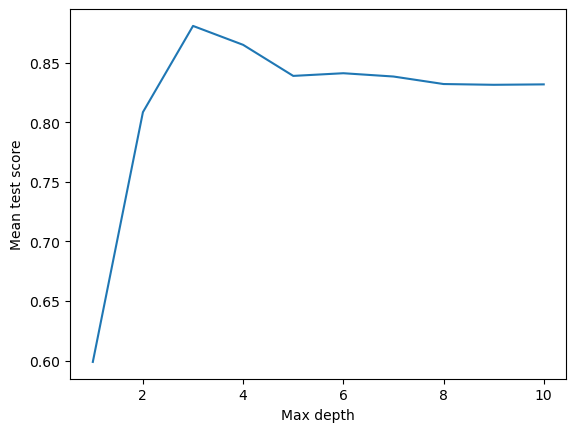

In [27]:
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('Max depth')
plt.ylabel('Mean test score')

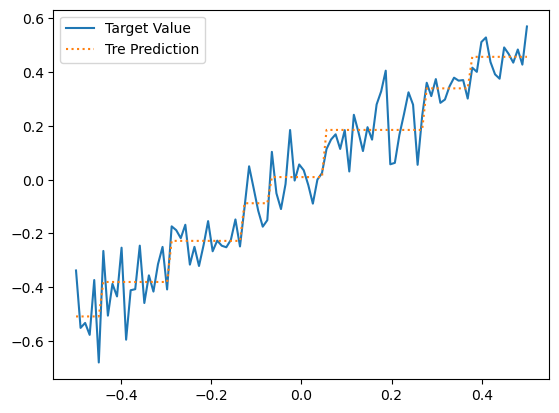

In [29]:
simple_tree_3 = DecisionTreeRegressor(max_depth=3)
simple_tree_3.fit(xs, y)
y_pred_3 = simple_tree_3.predict(xs)
plt.plot(xs, y, label='Target Value')
plt.plot(x, y_pred_3, label='Tre Prediction', linestyle='dotted')
plt.legend()


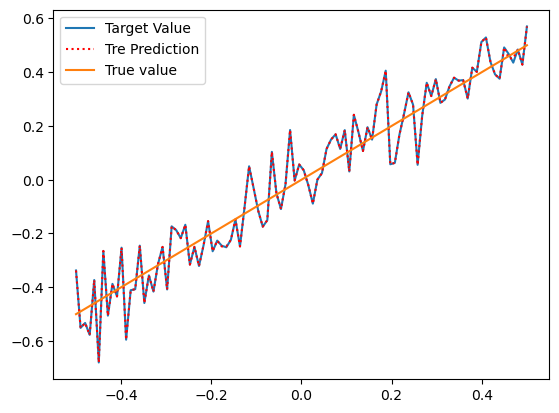

In [34]:
simple_tree_10 = DecisionTreeRegressor(max_depth=10)
simple_tree_10.fit(xs, y)
y_pred_10 = simple_tree_10.predict(xs)
plt.plot(xs, y, label='Target Value')
plt.plot(x, y_pred_10, label='Tre Prediction', linestyle='dotted', color='r')
plt.plot(x, x, label='True value')
plt.legend()


In [35]:
diff = y - y_pred_10
diff

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00285114, -0.00285114,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

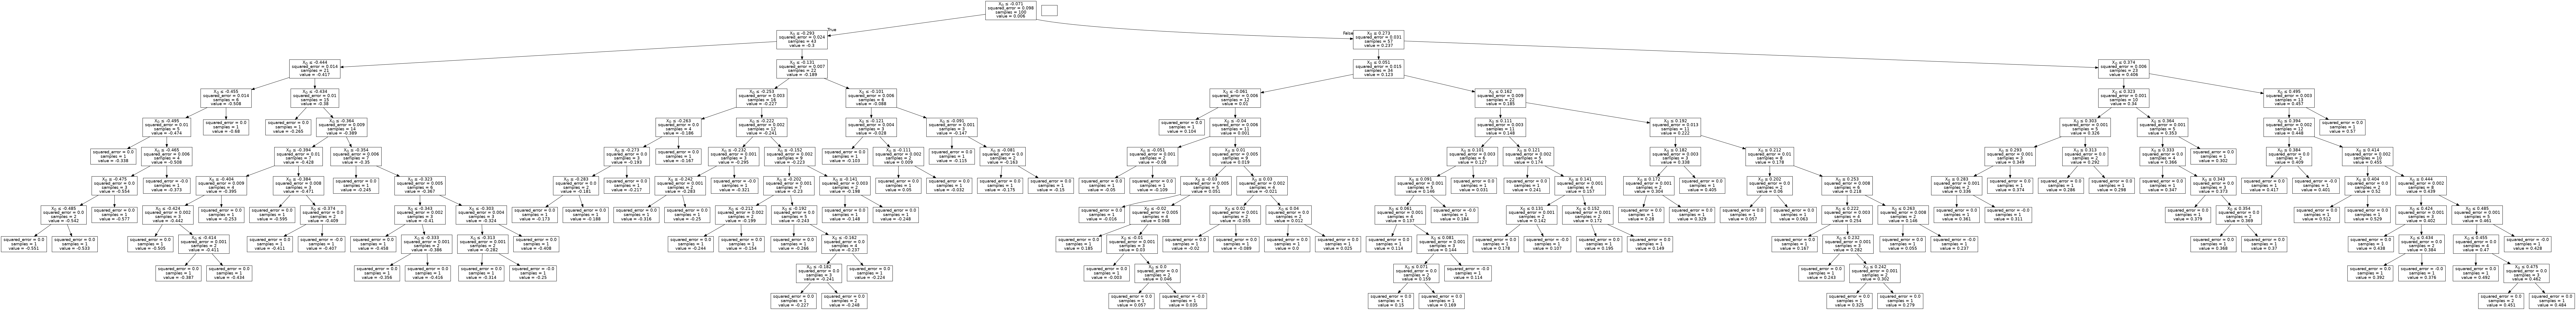

In [36]:
dot_data = StringIO()
tree.export_graphviz(simple_tree_10, out_file=dot_data, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [37]:
simple_tree_10.get_n_leaves()

98

In [38]:
from sklearn.metrics import mean_squared_error

all_depth = []
all_mses = []
y_true = x

for max_depth in range(1, 11):
    all_depth.append(max_depth)
    simple_tree = DecisionTreeRegressor(max_depth=max_depth)
    simple_tree.fit(xs, y)
    y_pred = simple_tree.predict(xs)
    mse = mean_squared_error(y_pred, y_true)
    all_mses.append(mse)



Text(0, 0.5, 'Mean mean squared error')

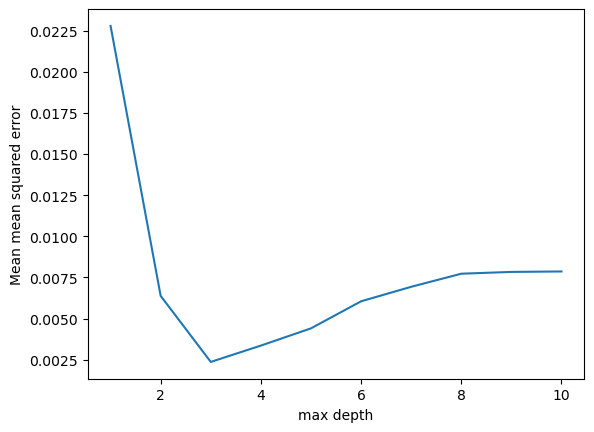

In [41]:
plt.plot(all_depth, all_mses)
plt.xlabel('max depth')
plt.ylabel('Mean mean squared error')